In [142]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('Glass Identification.csv')
df

,Id number,RI:refractive index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [143]:
df["Type of glass"].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [144]:
df= df.drop_duplicates() # Removing duplicate entries
df.shape

(214, 11)

### Note1: Classification model will be applied

# EDA

# Null/Nan

In [145]:
df.isnull().sum()

Id number              0
RI:refractive index    0
Na                     0
Mg                     0
Al                     0
Si                     0
K                      0
Ca                     0
Ba                     0
Fe                     0
Type of glass          0
dtype: int64

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id number            214 non-null    int64  
 1   RI:refractive index  214 non-null    float64
 2   Na                   214 non-null    float64
 3   Mg                   214 non-null    float64
 4   Al                   214 non-null    float64
 5   Si                   214 non-null    float64
 6   K                    214 non-null    float64
 7   Ca                   214 non-null    float64
 8   Ba                   214 non-null    float64
 9   Fe                   214 non-null    float64
 10  Type of glass        214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [147]:
# Checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Id number
1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: count, Length: 214, dtype: int64


RI:refractive index
1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: count, Length: 178, dtype: int64


Na
13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: count, Length: 142, dtype: int64


Mg
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: count, Length: 94, dtype: int64


Al
1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: count, Length: 118, dtype: int64


Si
72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: count, Length: 133, dtype: int64


In [148]:
df.nunique().to_frame("No of unique values")

,No of unique values
Id number,214
RI:refractive index,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32


# Id number can be dropped as it has unique values.
## Type of glass is categorical data

In [149]:
columns_to_drop=["Id number"]
df = df.drop(columns_to_drop, axis=1)

In [150]:
df.shape

(214, 10)

In [151]:
df= df.drop_duplicates() # Removing duplicate entries
df.shape

(213, 10)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RI:refractive index  213 non-null    float64
 1   Na                   213 non-null    float64
 2   Mg                   213 non-null    float64
 3   Al                   213 non-null    float64
 4   Si                   213 non-null    float64
 5   K                    213 non-null    float64
 6   Ca                   213 non-null    float64
 7   Ba                   213 non-null    float64
 8   Fe                   213 non-null    float64
 9   Type of glass        213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


In [153]:
df.describe()

,RI:refractive index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


###
- Column count is same: No missing data
- There is no negative/valid _ Dataset is OK
- Median (50%) > Mean - Mg,Al,Ca,fe --> Left Skewed
- Median (50%) < Mean - "Ba" -> Right Skewed
- Standard Dev is o.k
- Percentile 75% and max : It is there in "Na", "K" ,"Ca","Ba"- outliars are present

In [154]:
df.skew()

RI:refractive index    1.648017
Na                     0.465699
Mg                    -1.146096
Al                     0.938402
Si                    -0.744646
K                      6.545429
Ca                     2.050752
Ba                     3.406749
Fe                     1.747173
Type of glass          1.108861
dtype: float64

k is skewed

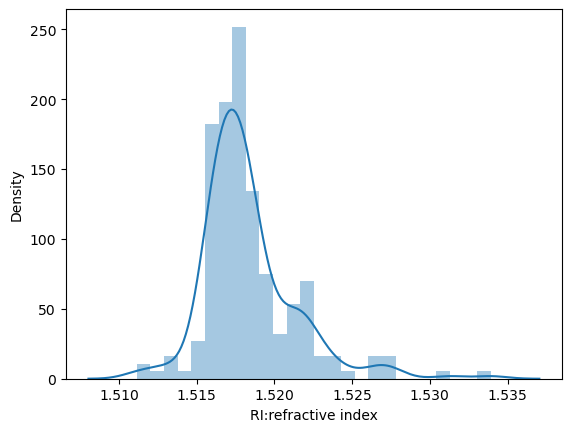

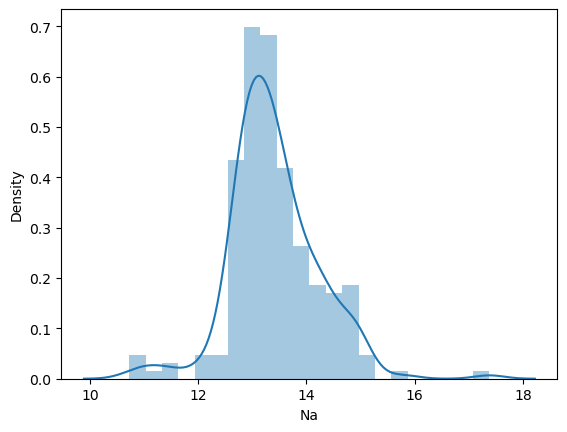

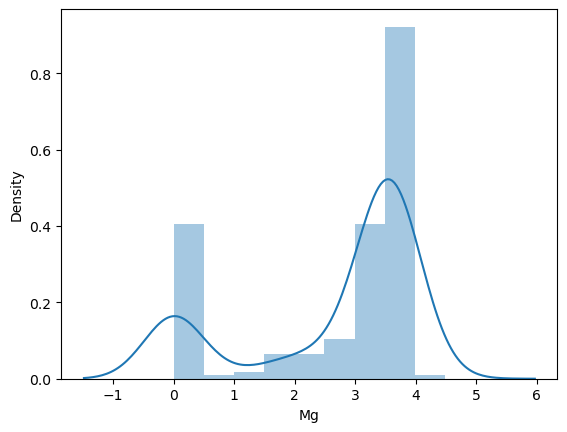

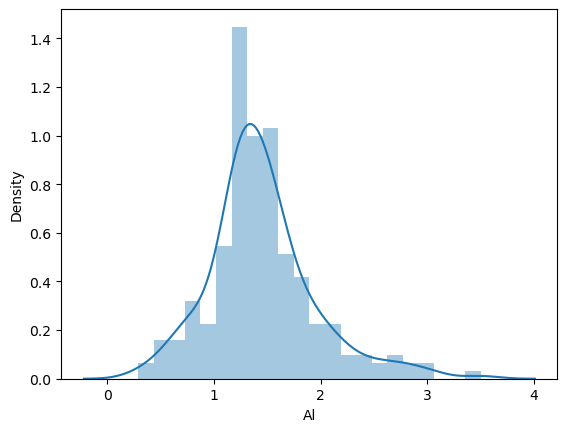

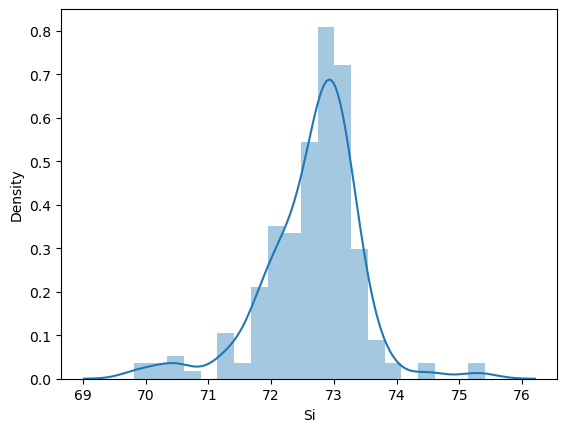

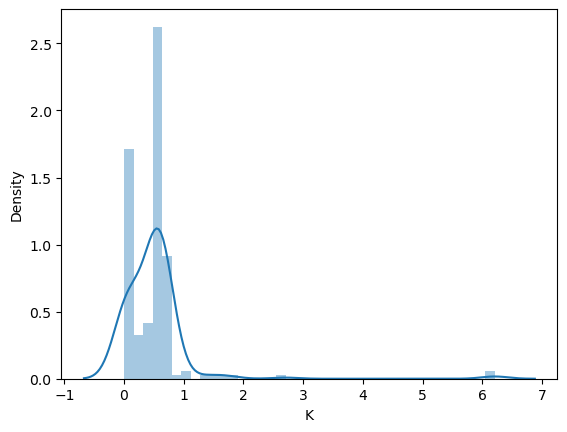

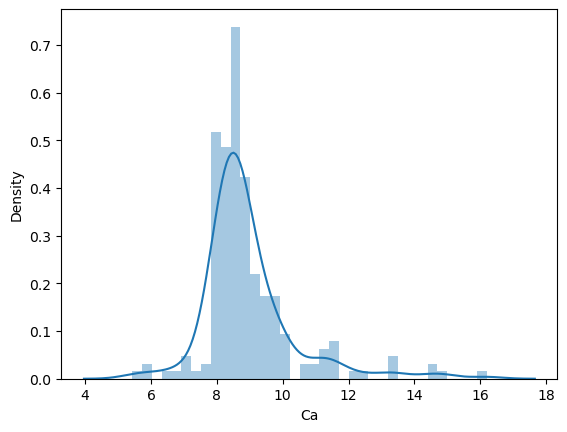

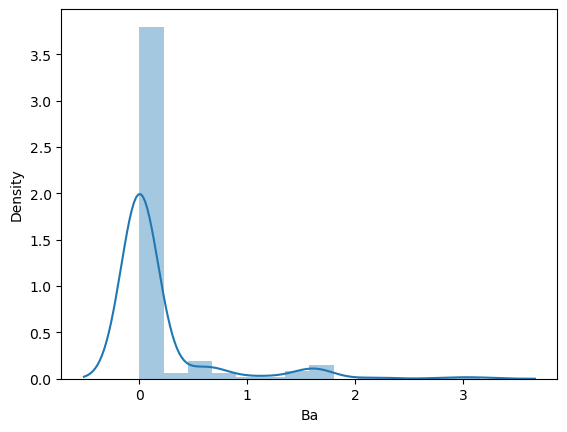

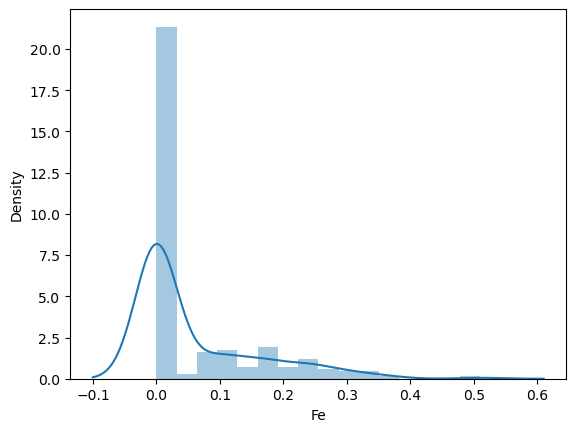

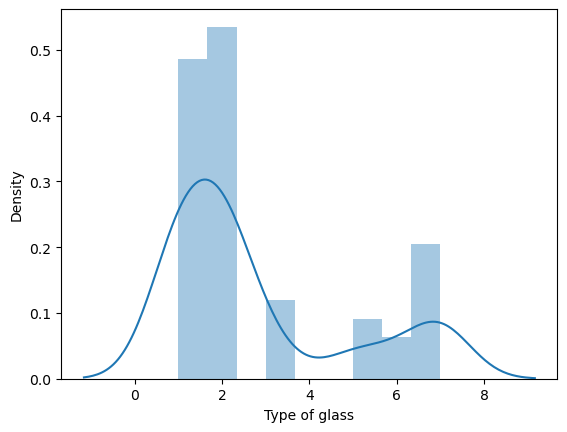

In [155]:
for i in df.columns: # Skewness
    plt.figure()
    sns.distplot(df[i])

In [156]:
df.nunique().to_frame("No of unique values")

,No of unique values
RI:refractive index,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32
Type of glass,6


In [157]:
x= ['Na', 'Mg', 'K','Ba', 'Fe']
for i in x:
    df[i]=np.cbrt(df[i])
df.skew()

RI:refractive index    1.648017
Na                     0.183424
Mg                    -1.433094
Al                     0.938402
Si                    -0.744646
K                     -0.599103
Ca                     2.050752
Ba                     2.065220
Fe                     0.887382
Type of glass          1.108861
dtype: float64

RI:refractive index       Axes(0.125,0.653529;0.168478x0.226471)
Na                     Axes(0.327174,0.653529;0.168478x0.226471)
Mg                     Axes(0.529348,0.653529;0.168478x0.226471)
Al                     Axes(0.731522,0.653529;0.168478x0.226471)
Si                        Axes(0.125,0.381765;0.168478x0.226471)
K                      Axes(0.327174,0.381765;0.168478x0.226471)
Ca                     Axes(0.529348,0.381765;0.168478x0.226471)
Ba                     Axes(0.731522,0.381765;0.168478x0.226471)
Fe                            Axes(0.125,0.11;0.168478x0.226471)
Type of glass              Axes(0.327174,0.11;0.168478x0.226471)
dtype: object

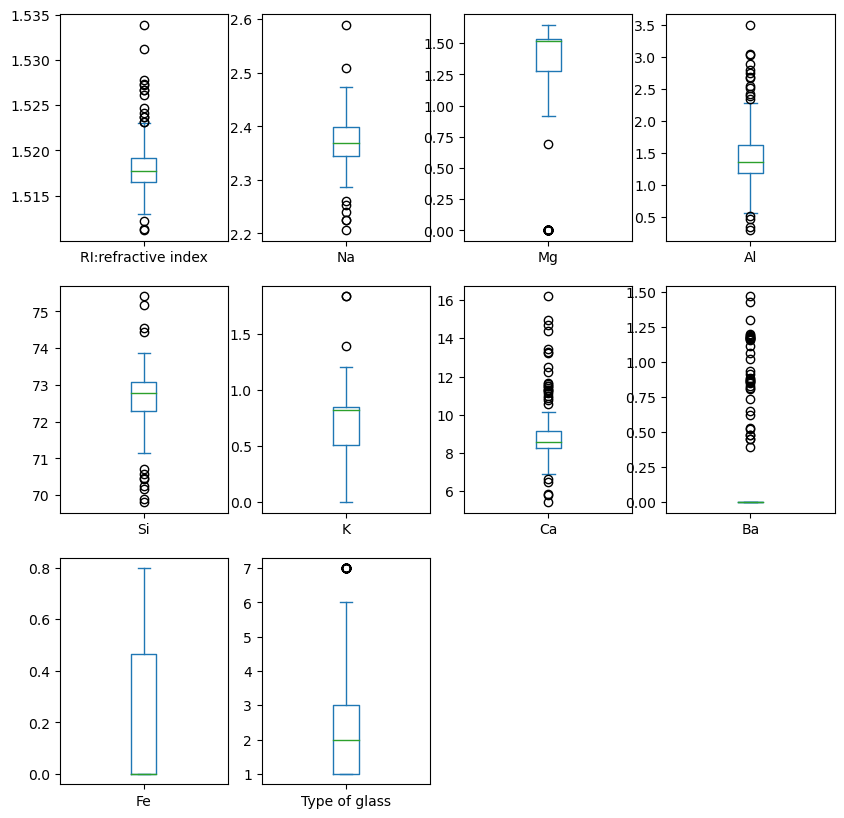

In [158]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(10,10))

Remove Outliers

In [159]:
from scipy.stats import zscore
ol = ['RI:refractive index', 'Al' , "Si","K",'Ca','Ba', 'Fe']
x_x=0
for i in ol:
    y_y=0
    col = df[i]
    z=zscore(col)
    thresh =3
    df1 = df[(z < thresh) & (z > -thresh)]
    y_y = df.shape[0]-df1.shape[0]
    x_x= x_x + y_y

print("Data loss rate",(x_x/df.shape[0])*100)

Data loss rate 11.267605633802818


# 4. Co- Relation and Multicolinearity

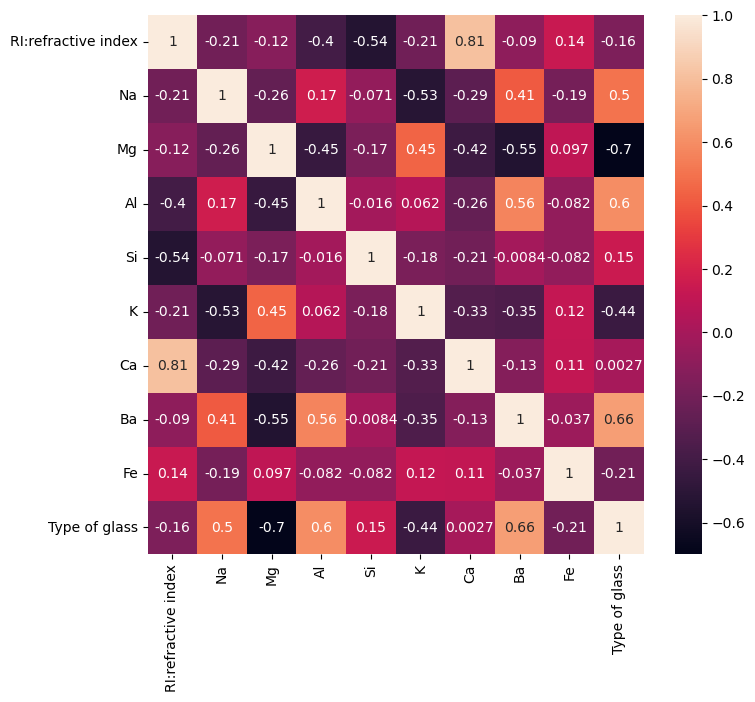

In [160]:
corr_hmap=df1.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

- Near to Zero : Refractive Index,Si, K,Ca,Fe,Si.  With lowest with Ca 
- 0.3 or >-0.3 -- Na , K
- 0.5 or >-0.5 --> Mod Corelation - "Ba,Al
- 0.7 or >-0.7 --> High Corelation - "Mg"

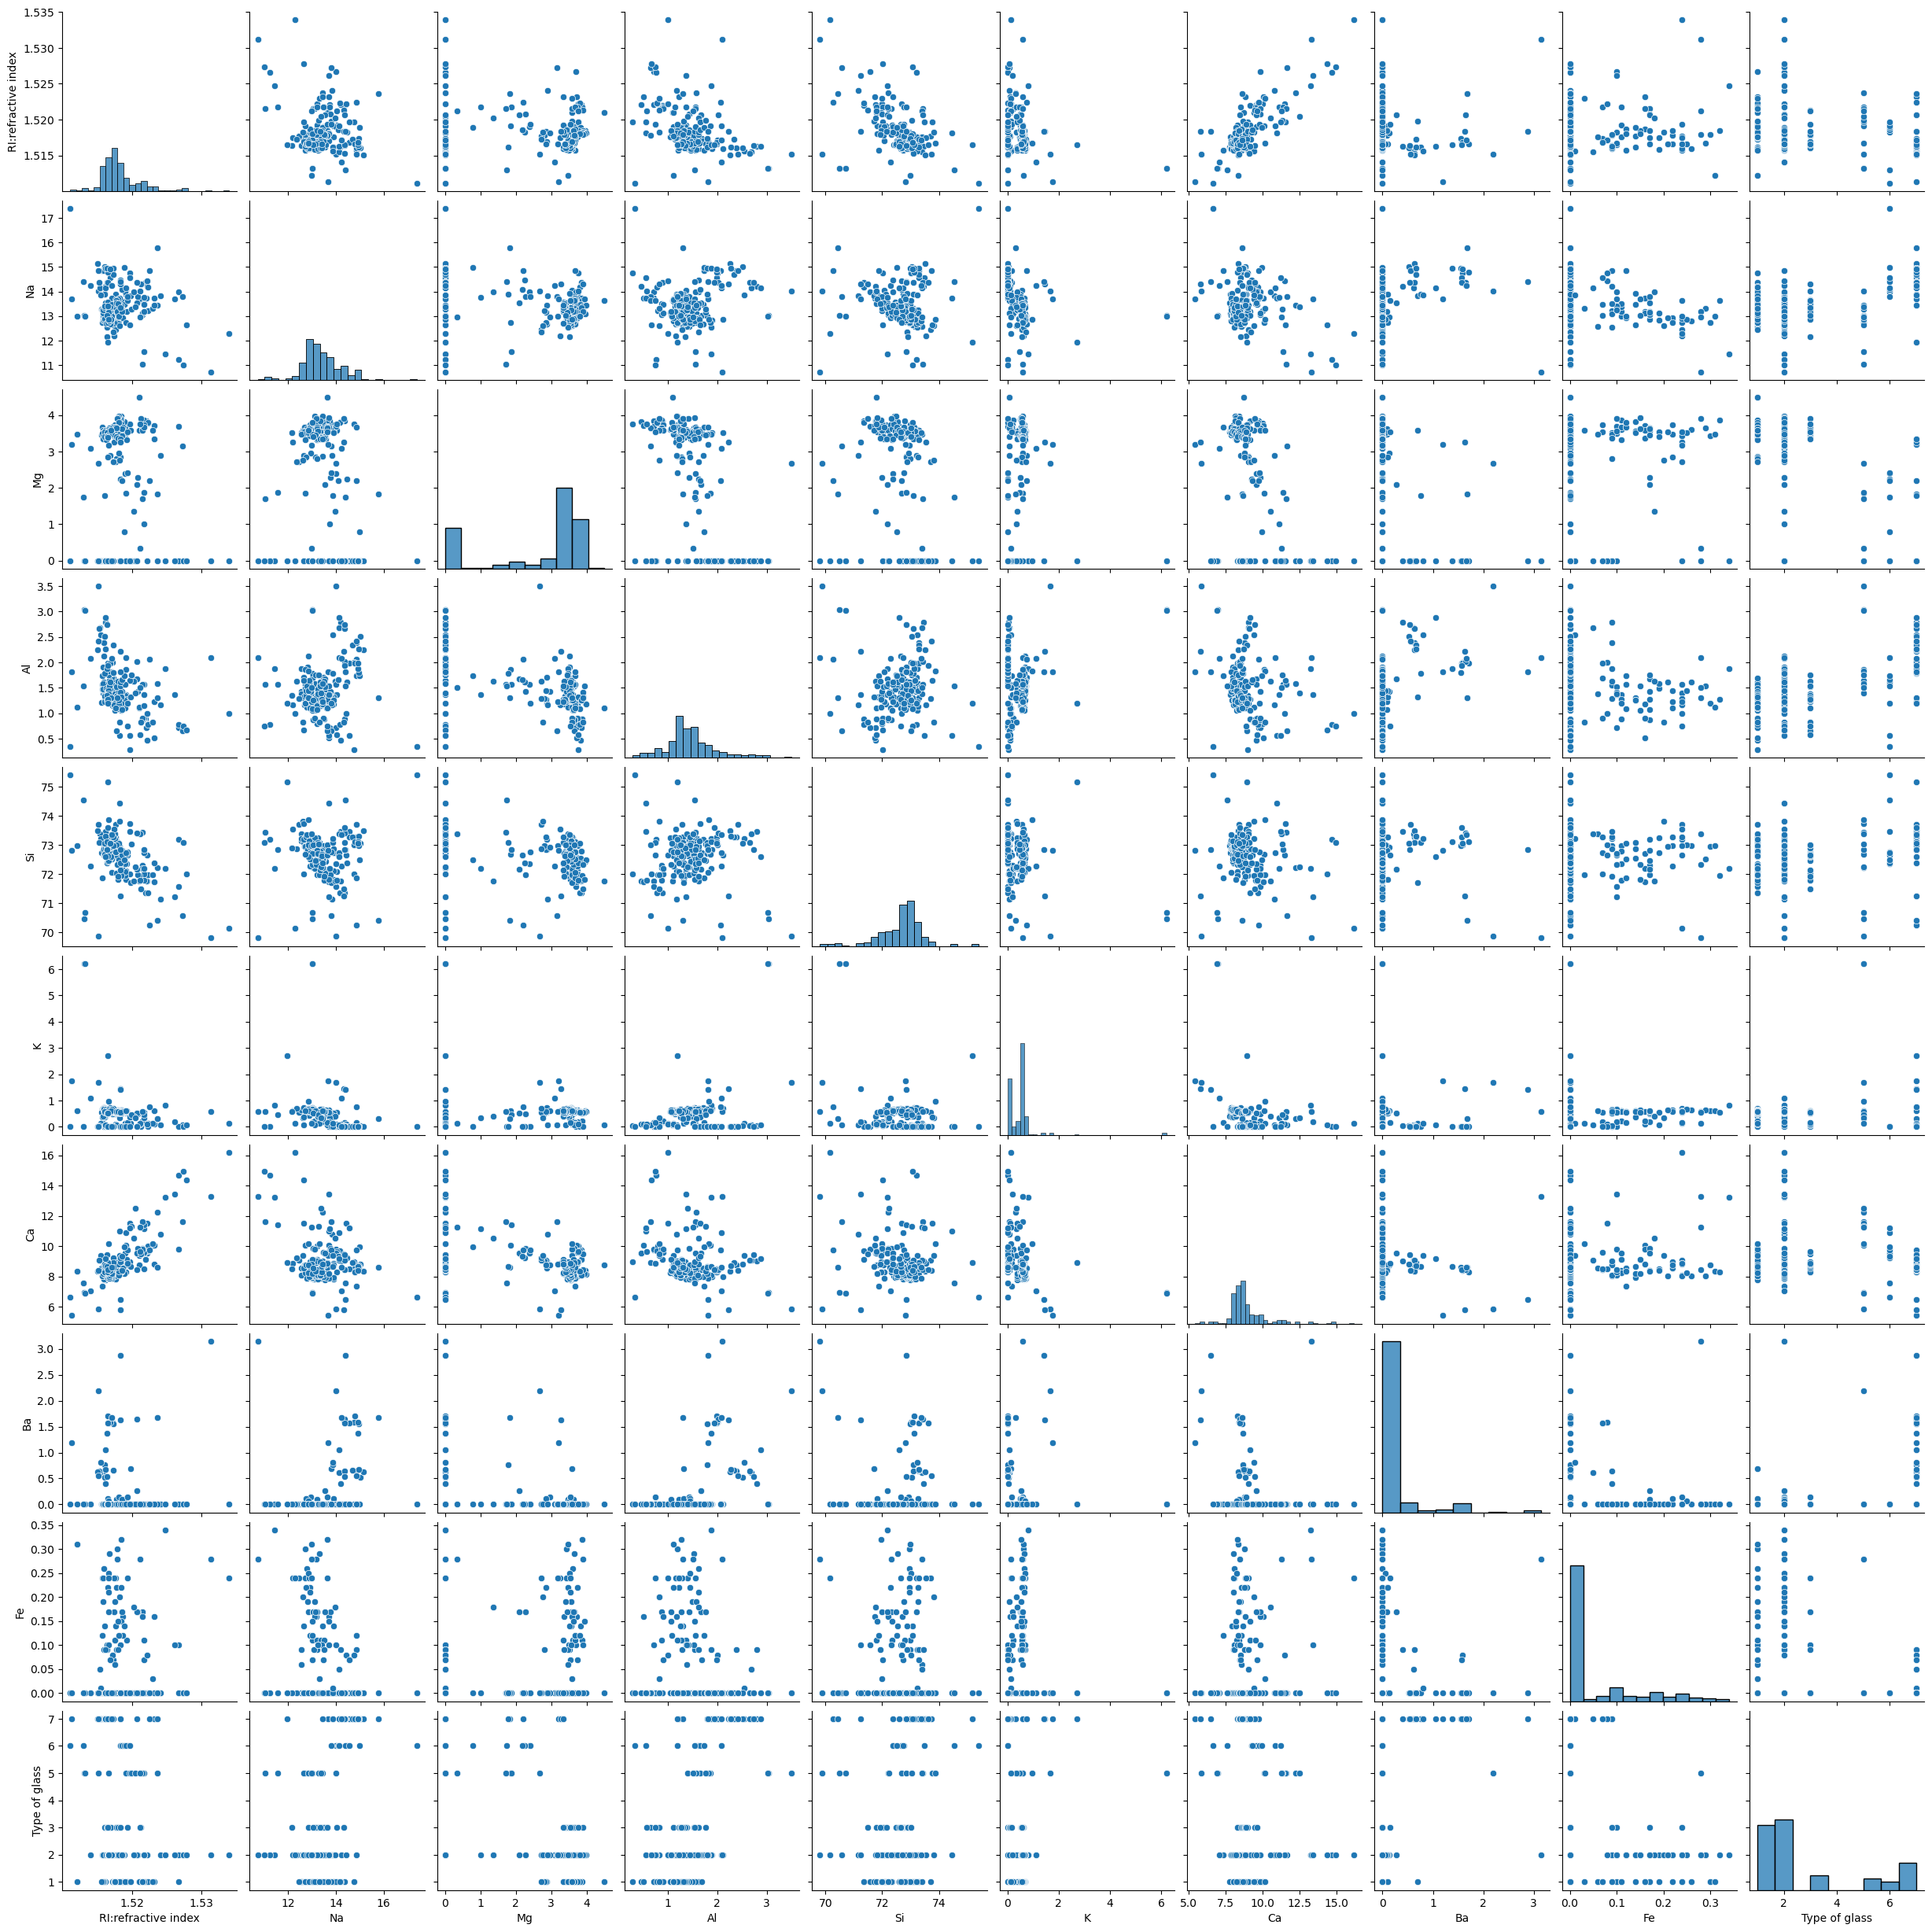

In [25]:
sns.pairplot(df1)

In [161]:
df.columns

Index(['RI:refractive index', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

In [162]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.iloc[:,0:-1]
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
vif_cal()

     VIF Factor             features
0  57793.292536  RI:refractive index
1  10134.180896                   Na
2     30.232262                   Mg
3     23.104757                   Al
4  18810.841849                   Si
5     19.349092                    K
6    369.140156                   Ca
7      3.470712                   Ba
8      1.589297                   Fe


In [163]:
columns_to_drop=['RI:refractive index','Ca',"Si"] # Least co-relation with output and high multicollinearity
df = df.drop(columns_to_drop, axis=1)
df

,Na,Mg,Al,K,Ba,Fe,Type of glass
0,2.389304,1.649740,1.10,0.391487,0.000000,0.0,1
1,2.403813,1.532619,1.36,0.782974,0.000000,0.0,1
2,2.382864,1.525490,1.54,0.730614,0.000000,0.0,1
3,2.363928,1.545286,1.29,0.829134,0.000000,0.0,1
4,2.367502,1.535452,1.24,0.819321,0.000000,0.0,1
...,...,...,...,...,...,...,...
209,2.418149,0.000000,2.88,0.430887,1.019613,0.0,7
210,2.461820,0.000000,1.99,0.000000,1.167165,0.0,7
211,2.430626,0.000000,2.02,0.000000,1.179274,0.0,7
212,2.431754,0.000000,1.94,0.000000,1.162251,0.0,7


In [164]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.iloc[:,0:-1]
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
vif_cal()

   VIF Factor features
0   23.408166       Na
1    9.116338       Mg
2   18.451264       Al
3    8.137073        K
4    2.348849       Ba
5    1.501954       Fe


# MODEL
## 1. Feature Scaling using Standard Scalarization

In [165]:
y=df["Type of glass"]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Na,Mg,Al,K,Ba,Fe
0,0.309382,0.760812,-0.706370,-0.837263,-0.440699,-0.681713
1,0.612220,0.565898,-0.180863,0.342982,-0.440699,-0.681713
2,0.174961,0.554035,0.182950,0.185131,-0.440699,-0.681713
3,-0.220273,0.586978,-0.322346,0.482147,-0.440699,-0.681713
4,-0.145684,0.570613,-0.423405,0.452562,-0.440699,-0.681713
...,...,...,...,...,...,...
208,0.911445,-1.984702,2.891336,-0.718480,2.311385,-0.681713
209,1.822943,-1.984702,1.092483,-2.017507,2.709650,-0.681713
210,1.171859,-1.984702,1.153118,-2.017507,2.742333,-0.681713
211,1.195401,-1.984702,0.991424,-2.017507,2.696385,-0.681713


# 2. OverSampling

In [166]:
y.value_counts()

Type of glass
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [167]:
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1=SM.fit_resample(x,y)

In [168]:
y1.value_counts()

Type of glass
1    76
2    76
3    76
5    76
6    76
7    76
Name: count, dtype: int64

## 3. Best random state value:

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



maxAccu=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS=i
print("Best accuracy is", maxAccu," at random state ", maxRS)

Best accuracy is 0.8978102189781022  at random state  6


4. Creating train test split

In [170]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)

5. Classification Algorithms and Cross Validation Score

In [171]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
rfc=RandomForestClassifier()
etc=ExtraTreesClassifier()
lg=LogisticRegression()
svc=SVC(kernel = "linear")
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
dtc = DecisionTreeClassifier(criterion = "gini")



model=[rfc,etc,lg,svc,gbc,abc,bc,gnb,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of:  ",m," is " )
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("\n")
    score = cross_val_score(m,x1,y1)
    print("Cross Validation of:  ",m," is " )
    print(score)
    print(score.mean())
    print("Diff in Acc Score and Cross Val Score is - ",accuracy_score(y_test,predm)-score.mean())
    print("\n")

Accuracy Score of:   RandomForestClassifier()  is 
0.8832116788321168
[[12  3  6  0  0  0]
 [ 4 17  0  0  0  0]
 [ 2  0 21  0  0  0]
 [ 0  0  0 22  0  1]
 [ 0  0  0  0 27  0]
 [ 0  0  0  0  0 22]]
              precision    recall  f1-score   support

           1       0.67      0.57      0.62        21
           2       0.85      0.81      0.83        21
           3       0.78      0.91      0.84        23
           5       1.00      0.96      0.98        23
           6       1.00      1.00      1.00        27
           7       0.96      1.00      0.98        22

    accuracy                           0.88       137
   macro avg       0.88      0.88      0.87       137
weighted avg       0.88      0.88      0.88       137



Cross Validation of:   RandomForestClassifier()  is 
[0.7826087  0.81318681 0.8021978  0.84615385 0.82417582]
0.813664596273292
Diff in Acc Score and Cross Val Score is -  0.0695470825588248


Accuracy Score of:   ExtraTreesClassifier()  is 
0.91240875912408

Cross Validation of:   DecisionTreeClassifier()  is 
[0.80434783 0.72527473 0.79120879 0.79120879 0.81318681]
0.7850453893932154
Diff in Acc Score and Cross Val Score is -  0.025173588708974348




Best Model is : ExtraTreesClassifier(),RandomForestClassifier()

# 6. Hyper Parameter Tuning

In [172]:
from sklearn.model_selection import GridSearchCV
parameters = {"criterion" : ["gini", "entropy", "log_loss"],
             "random_state" :[maxRS],
             "max_depth": [0,10,20],
             "n_jobs": [-2,-1,1],
             "n_estimators":[50,100,200,300],
             "class_weight": ["balanced", "balanced_subsample"],
             "max_features": ["sqrt","log2","None"]}

In [173]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [174]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [0, 10, 20],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1], 'random_state': [6]})

In [175]:
GCV.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 6}

In [176]:
etc_bp = ExtraTreesClassifier(criterion="gini",random_state=2,max_features="sqrt",max_depth=10, class_weight="balanced",n_estimators=50,n_jobs=-2)
etc_bp.fit(x_train,y_train)
pred=etc_bp.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

89.78102189781022


In [177]:
df['Type of glass_2'] = df['Type of glass'].apply(lambda x: 'window glass' if x < 5 else 'non window glass')

In [178]:
df

,Na,Mg,Al,K,Ba,Fe,Type of glass,Type of glass_2
0,2.389304,1.649740,1.10,0.391487,0.000000,0.0,1,window glass
1,2.403813,1.532619,1.36,0.782974,0.000000,0.0,1,window glass
2,2.382864,1.525490,1.54,0.730614,0.000000,0.0,1,window glass
3,2.363928,1.545286,1.29,0.829134,0.000000,0.0,1,window glass
4,2.367502,1.535452,1.24,0.819321,0.000000,0.0,1,window glass
...,...,...,...,...,...,...,...,...
209,2.418149,0.000000,2.88,0.430887,1.019613,0.0,7,non window glass
210,2.461820,0.000000,1.99,0.000000,1.167165,0.0,7,non window glass
211,2.430626,0.000000,2.02,0.000000,1.179274,0.0,7,non window glass
212,2.431754,0.000000,1.94,0.000000,1.162251,0.0,7,non window glass


# 8. Saving the Model

In [179]:
import joblib # save as *.pkl
joblib.dump(etc_bp,"Glass_Identification.pkl")

['Glass_Identification.pkl']